<a id="section4"></a>
## 2.4 Classification schemes

The common alternative to a proportionial color map is to use a **classification scheme** to create a **graduated color map**. This is the standard way to create a **choropleth map**.

A `Classification scheme` is a method for binning continuous data values into 4-7 classes (the default is 5) and map those classes to a color palette. 

There are a few commonly used classifications schemes:

- `EQUAL INTERVAL` divides the data into equal size data ranges (e.g., 0-10, 10-20, 20-30, etc.). This scheme is best for data that is spread across the entire range of values. It also is easily understandable by map readers. However, avoid it if you have highly skewed data or a few big outliers.
 
 
- `QUANTILE` classification places an equal number of observations in each bin. This scheme creates nice maps because it best spreads the colors across the full set of data values. For this reason it is the default scheme used by mapping software. The downside of quantile classes is that since the bin ranges are based on the number of observations and not the data values different classes can have very similar or very different values.
 
 
- `NATURAL BREAKS` classification schemes like `fisher-jenks` minimize within-class variance and maximize between-class differences. This is great for exploratory data analysis since it can identify natural groupings in the data. However, since the class breaks are best fit to one dataset, the same bins cannot easily be used for multiple year comparisons because each year has a differnt scale.
 
 
- `MANUAL` classifications are user-defined by the map creator. This is especially useful if you want to slightly change the breaks of another classification scheme or use a fixed set of breaks to compare data over time.


### Classification schemes and GeoDataFrames

Classification schemes can be implemented using the geodataframe `plot` method by setting a value for the **scheme** argument. This requires the [pysal](https://pysal.org/) and [mapclassify](https://pysal.org/mapclassify) libraries to be installed in your Python environment. 

Here is a list of the `classification schemes` names that we will use:
-  `equalinterval`, `quantiles`,`fisherjenks`,`naturalbreaks`, and `userdefined`.

For more information about these classification schemes see the [pysal mapclassifiers web page](https://pysal.org/mapclassify/api.html) or check out the help docs.

In [82]:
# Uncomment & run to see the help docs for plot - check out the scheme parameter
#help(tracts_acs_gdf.plot)

### Classification schemes in action

Let's redo the last map using the `quantile` classification scheme.

- What is different about the code...and the output map?

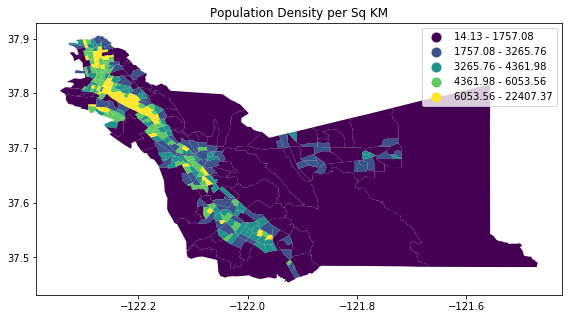

In [84]:
# Plot population density - km^2
fig, ax = plt.subplots(figsize = (10,5)) 
tracts_acs_gdf.plot(column='pop_dens_km2', 
                   scheme="quantiles",
                   legend=True,
                   ax=ax
                   )
ax.set_title("Population Density per Sq KM")
plt.show()

#### Exercise

Repeat the above map, testing 3 other classification schemes. Note the difference in the output.

In [87]:
# Your code here

*Click here for answers*

<!--- 
    fig, ax = plt.subplots(figsize = (10,5)) 
    tracts_acs_gdf.plot(column='pop_dens_km2', 
                       scheme="equalinterval",
                       legend=True,
                       ax=ax
                       )
    ax.set_title("Population Density per Sq KM - Equal Interval")
    plt.show()

    fig, ax = plt.subplots(figsize = (10,5)) 
    tracts_acs_gdf.plot(column='pop_dens_km2', 
                       scheme="fisherjenks",
                       legend=True,
                       ax=ax
                       )
    ax.set_title("Population Density per Sq KM - Fisher Jenks")
    plt.show()

    fig, ax = plt.subplots(figsize = (10,5)) 
    tracts_acs_gdf.plot(column='pop_dens_km2', 
                       scheme="naturalbreaks",
                       legend=True,
                       ax=ax
                       )
    ax.set_title("Population Density per Sq KM - Natural Breaks")
    plt.show()
--->

### User Defined Classification Schemes

You may get pretty close to your final map without being completely satisfied. In this case you can manually define a classification scheme.

Let's customize our map with a `user-defined` classification scheme where we manually set the breaks for the bins using the `classification_kwds` argument.

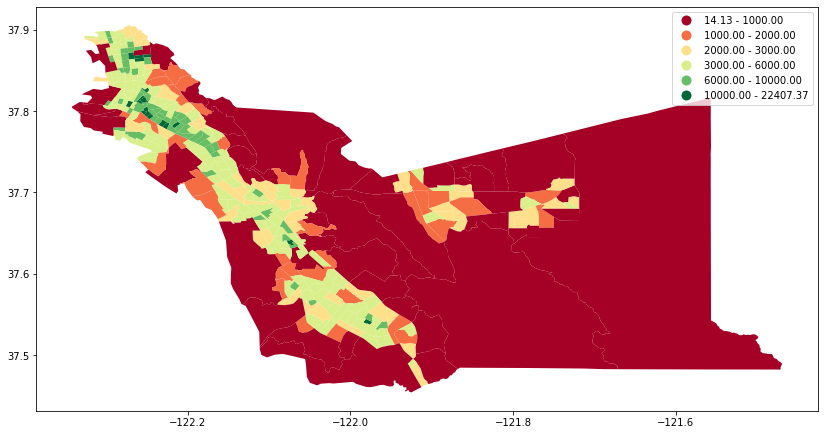

In [21]:
fig, ax = plt.subplots(figsize = (14,8)) 
tracts_acs_gdf.plot(column='pop_dens_km2', 
                    legend=True, 
                    cmap="RdYlGn", 
                    scheme='user_defined', 
                    classification_kwds={'bins':[1000,2000,3000,6000,10000]},
                    ax=ax)
plt.show()

Since we are customizing our plot, we can also edit our legend to specify and format the text so that it's easier to read.

- We'll use `legend_labels_list` to customize the labels for group in the legend.

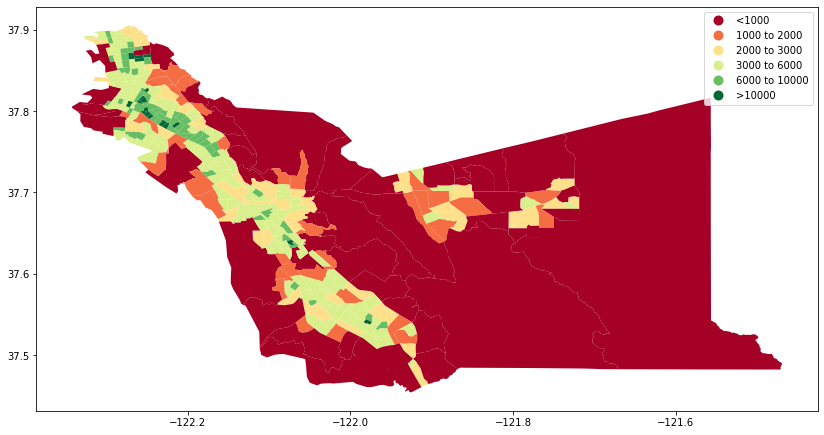

In [88]:
fig, ax = plt.subplots(figsize = (14,8)) 
tracts_acs_gdf.plot(column='pop_dens_km2', 
                    legend=True, 
                    cmap="RdYlGn", 
                    scheme='user_defined', 
                    classification_kwds={'bins':[1000,2000,3000,6000,10000]},
                    ax=ax)

# Create the labels for the legend
legend_labels_list = ['<1000','1000 to 2000','2000 to 3000','3000 to 6000','6000 to 10000','>10000']

# Apply the labels to the plot
for j in range(0,len(ax.get_legend().get_texts())):
        ax.get_legend().get_texts()[j].set_text(legend_labels_list[j])

plt.show()

<div style="display:inline-block;vertical-align:top;">
    <img src="http://www.pngall.com/wp-content/uploads/2016/03/Light-Bulb-Free-PNG-Image.png" width="30" align=left > 
</div>  
<div style="display:inline-block;">

#### Question
</div>

In the cell above, how could you redo the above plot to add commas to the numbers in the legend?

In [23]:
# Write your thoughts here

If we look at the columns in our data we have a number of variables that are proportions that we can map, like `p_white`.  We can map those proportions or dynamically change them to percents in our map by setting the `classification_kwds` with the thresholds for each bin.

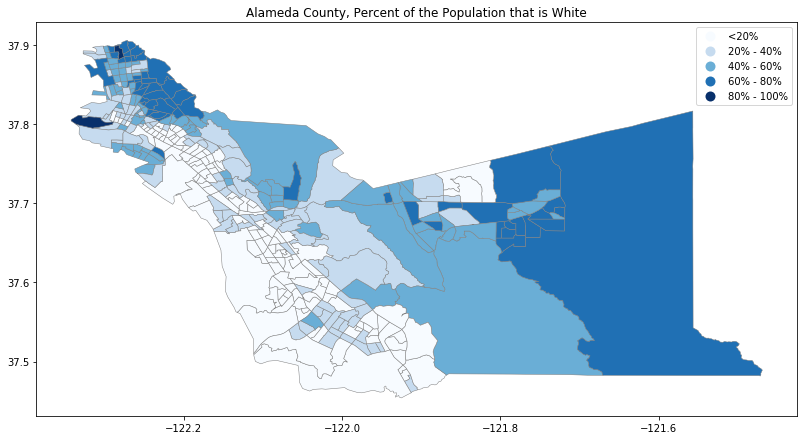

In [97]:
fig, ax = plt.subplots(figsize = (15,6)) 

# Plot percent non-white as choropleth
tracts_acs_gdf.plot(column=(tracts_acs_gdf['p_white'] * 100), 
                        legend=True, 
                        cmap="Blues", 
                        scheme='user_defined', 
                        classification_kwds={'bins':[20,40,60,80]},
                        edgecolor="grey",
                        linewidth=0.5,
                        ax=ax)

legend_labels_list = ['<20%','20% - 40%','40% - 60%','60% - 80%','80% - 100%']
for j in range(0,len(ax.get_legend().get_texts())):
        ax.get_legend().get_texts()[j].set_text(legend_labels_list[j])

plt.tight_layout()
plt.title("Alameda County, Percent of the Population that is White")
plt.show()

<div style="display:inline-block;vertical-align:top;">
    <img src="http://www.pngall.com/wp-content/uploads/2016/03/Light-Bulb-Free-PNG-Image.png" width="30" align=left > 
</div>  
<div style="display:inline-block;">

#### Questions
</div>

1. What new options have we added to our map code?
2. How many break values do we specify in the `classification_kwds` bins list and how many bins are in the map legend?